# 순차열 데이터 처리

순차열 데이터는 정형 데이터로 변형해서 처리한다.

순차열 데이터가 다음과 같을 때
```
0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
<---- x ---->  y          : [0 1 2 3 4] -> 5
   <---- x ---->  y       : [1 2 3 4 5] -> 6
      <---- x ---->  y    : [2 3 4 5 6] -> 7
         <---- x ---->  y : [3 4 5 6 7] -> 8
```
x는 길이 5이고, y는 x 다음 값으로 샘플링한다.

결국 다음 순차열 데이터로
```
0 1 2 3 4 5 6 7 8 9 
```

다음과 같은 데이터로 정형 데이터를 생성한다.
```
0 1 2 3 4, 5
1 2 3 4 5, 6
2 3 4 5 6, 7
3 4 5 6 7, 8
4 5 6 7 8, 9
```

## 수작업에 의한

In [1]:
import numpy as np

series = np.arange(20)
print(series)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [2]:
a_data_length = 5

x = []
y = []
for i in range(len(series)):
  if i+a_data_length+1 > len(series): break
  a_data = series[i:i+a_data_length]
  x.append(a_data)
  y.append(series[i+a_data_length])

x = np.array(x)
y = np.array(y)

print(x)
print(y)

[[ 0  1  2  3  4]
 [ 1  2  3  4  5]
 [ 2  3  4  5  6]
 [ 3  4  5  6  7]
 [ 4  5  6  7  8]
 [ 5  6  7  8  9]
 [ 6  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 12]
 [ 9 10 11 12 13]
 [10 11 12 13 14]
 [11 12 13 14 15]
 [12 13 14 15 16]
 [13 14 15 16 17]
 [14 15 16 17 18]]
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## TimeseriesGenerator에 의한

In [3]:
import numpy as np

series = np.arange(20)
print(series)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [4]:
from keras.preprocessing.sequence import TimeseriesGenerator

BIG_ENOUGH = len(series)+999
generator = TimeseriesGenerator(series, series, length=5, batch_size=BIG_ENOUGH)

x, y = generator[0]
print(x.shape)
print(y.shape)

print(x)
print(y)

(15, 5)
(15,)
[[ 0  1  2  3  4]
 [ 1  2  3  4  5]
 [ 2  3  4  5  6]
 [ 3  4  5  6  7]
 [ 4  5  6  7  8]
 [ 5  6  7  8  9]
 [ 6  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 12]
 [ 9 10 11 12 13]
 [10 11 12 13 14]
 [11 12 13 14 15]
 [12 13 14 15 16]
 [13 14 15 16 17]
 [14 15 16 17 18]]
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


# TimeseriesGenerator 옵션들

## batch_size

In [5]:
import numpy as np

series = np.arange(20)
print(series)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [6]:
from keras.preprocessing.sequence import TimeseriesGenerator

generator = TimeseriesGenerator(series, series, length=5, batch_size=4)

print("generator[0]")
x, y = generator[0]
print("x.shape =",x.shape)
print("y.shape =",y.shape)

print(x)
print(y)
print("\n")



print("generator[1]")
x, y = generator[1]
print("x.shape =",x.shape)
print("y.shape =",y.shape)

print(x)
print(y)


generator[0]
x.shape = (4, 5)
y.shape = (4,)
[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]]
[5 6 7 8]


generator[1]
x.shape = (4, 5)
y.shape = (4,)
[[ 4  5  6  7  8]
 [ 5  6  7  8  9]
 [ 6  7  8  9 10]
 [ 7  8  9 10 11]]
[ 9 10 11 12]


## shuffle=True

In [7]:
import numpy as np

series = np.arange(20)
print(series)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [8]:
from keras.preprocessing.sequence import TimeseriesGenerator

# generator = TimeseriesGenerator(series, series, length=5, batch_size=4)
generator = TimeseriesGenerator(series, series, length=5, batch_size=4, shuffle=True)

print("generator[0]")
x, y = generator[0]
print("x.shape =",x.shape)
print("y.shape =",y.shape)

print(x)
print(y)
print("\n")


generator[0]
x.shape = (4, 5)
y.shape = (4,)
[[ 7  8  9 10 11]
 [12 13 14 15 16]
 [ 0  1  2  3  4]
 [ 9 10 11 12 13]]
[12 17  5 14]




## sampling_rate

In [9]:
import numpy as np

series = np.arange(20)
print(series)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [10]:
from keras.preprocessing.sequence import TimeseriesGenerator

# generator = TimeseriesGenerator(series, series, length=5, batch_size=4)
generator = TimeseriesGenerator(series, series, length=5, batch_size=4, sampling_rate=2)

print("generator[0]")
x, y = generator[0]
print("x.shape =",x.shape)
print("y.shape =",y.shape)

print(x)
print(y)
print("\n")


generator[0]
x.shape = (4, 3)
y.shape = (4,)
[[0 2 4]
 [1 3 5]
 [2 4 6]
 [3 5 7]]
[5 6 7 8]




## stride

In [11]:
import numpy as np

series = np.arange(20)
print(series)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator

# generator = TimeseriesGenerator(series, series, length=5, batch_size=4)
generator = TimeseriesGenerator(series, series, length=5, batch_size=4, stride=2)

print("generator[0]")
x, y = generator[0]
print("x.shape =",x.shape)
print("y.shape =",y.shape)

print(x)
print(y)
print("\n")


generator[0]
x.shape = (4, 5)
y.shape = (4,)
[[ 0  1  2  3  4]
 [ 2  3  4  5  6]
 [ 4  5  6  7  8]
 [ 6  7  8  9 10]]
[ 5  7  9 11]




## start_index, end_index

In [13]:
import numpy as np

series = np.arange(20)
print(series)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

BIG_ENOUGH = len(series)+999
# generator = TimeseriesGenerator(series, series, length=5, batch_size=4)
train_generator = TimeseriesGenerator(series, series, length=5, batch_size=BIG_ENOUGH, end_index=12)
test_generator = TimeseriesGenerator(series, series, length=5, batch_size=BIG_ENOUGH, start_index=12)

print("train_generator[0]")
x, y = train_generator[0]
print("x.shape =",x.shape)
print("y.shape =",y.shape)

print(x)
print(y)
print("\n")


print("test_generator[0]")
x, y = test_generator[0]
print("x.shape =",x.shape)
print("y.shape =",y.shape)

print(x)
print(y)
print("\n")


train_generator[0]
x.shape = (8, 5)
y.shape = (8,)
[[ 0  1  2  3  4]
 [ 1  2  3  4  5]
 [ 2  3  4  5  6]
 [ 3  4  5  6  7]
 [ 4  5  6  7  8]
 [ 5  6  7  8  9]
 [ 6  7  8  9 10]
 [ 7  8  9 10 11]]
[ 5  6  7  8  9 10 11 12]


test_generator[0]
x.shape = (3, 5)
y.shape = (3,)
[[12 13 14 15 16]
 [13 14 15 16 17]
 [14 15 16 17 18]]
[17 18 19]




## target

In [15]:
import numpy as np

series = np.arange(20)
print(series)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [16]:
X_SEQUENCE_LENGTH = 5

target = np.empty_like(series)
target = (series%2==0).astype(np.int) # is even

In [17]:
print(series)
print(target)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [18]:
from keras.preprocessing.sequence import TimeseriesGenerator

# generator = TimeseriesGenerator(series, series, length=5, batch_size=4)
generator = TimeseriesGenerator(series, target, length=5, batch_size=4)

print("generator[0]")
x, y = generator[0]
print("x.shape =",x.shape)
print("y.shape =",y.shape)

print(x)
print(y)
print("\n")


generator[0]
x.shape = (4, 5)
y.shape = (4,)
[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]]
[0 1 0 1]




# 다중 순차열 데이터

In [19]:
import numpy as np

series1 = np.arange(20)
print(series1)

series2 = np.arange(20)*-1
print(series2)

series = np.stack([series1, series2], axis=1)
print(series)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19]
[[  0   0]
 [  1  -1]
 [  2  -2]
 [  3  -3]
 [  4  -4]
 [  5  -5]
 [  6  -6]
 [  7  -7]
 [  8  -8]
 [  9  -9]
 [ 10 -10]
 [ 11 -11]
 [ 12 -12]
 [ 13 -13]
 [ 14 -14]
 [ 15 -15]
 [ 16 -16]
 [ 17 -17]
 [ 18 -18]
 [ 19 -19]]


In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator

generator = TimeseriesGenerator(series, series, length=5, batch_size=4)

print("generator[0]")
x, y = generator[0]
print("x.shape =",x.shape)
print("y.shape =",y.shape)

print(x)
print(y)
print("\n")


generator[0]
x.shape = (4, 5, 2)
y.shape = (4, 2)
[[[ 0  0]
  [ 1 -1]
  [ 2 -2]
  [ 3 -3]
  [ 4 -4]]

 [[ 1 -1]
  [ 2 -2]
  [ 3 -3]
  [ 4 -4]
  [ 5 -5]]

 [[ 2 -2]
  [ 3 -3]
  [ 4 -4]
  [ 5 -5]
  [ 6 -6]]

 [[ 3 -3]
  [ 4 -4]
  [ 5 -5]
  [ 6 -6]
  [ 7 -7]]]
[[ 5 -5]
 [ 6 -6]
 [ 7 -7]
 [ 8 -8]]




# sine 데이터 예

In [21]:
import numpy as np

series = np.arange(0,100,0.1)
series = np.sin(series)

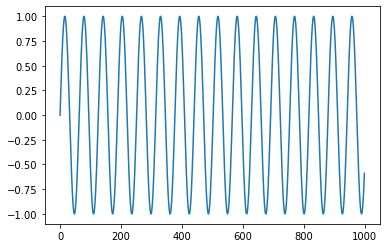

In [22]:
import matplotlib.pyplot as plt
plt.plot(series)
plt.show()

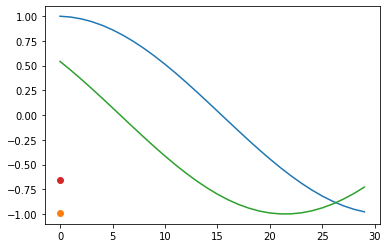

In [37]:
from keras.preprocessing.sequence import TimeseriesGenerator

split_index = int(len(series)*0.8)
generator = TimeseriesGenerator(series, series, length=30, batch_size=8, 
                                shuffle=True, end_index=split_index)

test_generator = TimeseriesGenerator(series, series, length=30, batch_size=128, 
                                     shuffle=False, start_index=split_index)

x, y = generator[0]
plt.plot(x[0])
plt.plot(y[0], 'o')
plt.plot(x[1])
plt.plot(y[1], 'o')
plt.show()

## by DNN

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()
model.add(Input((30,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(generator, steps_per_epoch=1, epochs=500, verbose=0)


2/2 [==============================] - 0s 7ms/step - loss: 2.9118e-04 - mae: 0.0128
mae= 0.01284436322748661


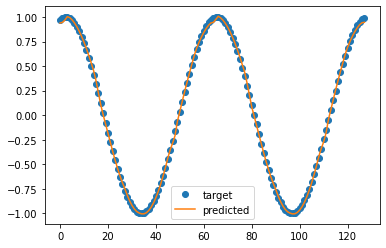

In [39]:
loss, mae = model.evaluate(test_generator)
print("mae=", mae)

x, y = test_generator[0]
y_ = model.predict(x)
plt.plot(y, 'o', label='target')
plt.plot(y_, label='predicted')
plt.legend()
plt.show()

## by LSTM

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Input, Reshape, LSTM

model = Sequential()
model.add(Input((30,)))
model.add(Reshape((30,1)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(generator, steps_per_epoch=1, epochs=500, verbose=0)


2/2 [==============================] - 1s 13ms/step - loss: 1.0535e-05 - mae: 0.0026
mae= 0.0026315029244869947


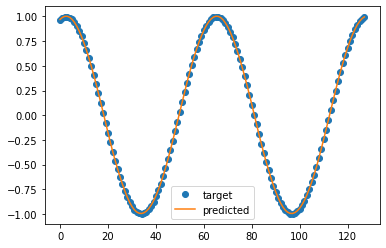

In [41]:
loss, mae = model.evaluate(test_generator)
print("mae=", mae)

x, y = test_generator[0]
y_ = model.predict(x)
plt.plot(y, 'o', label='target')
plt.plot(y_, label='predicted')
plt.legend()
plt.show()